In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

plt.rcParams['font.family'] = 'NanumGothic'

df = pd.read_csv("stats.csv", encoding="utf-8")

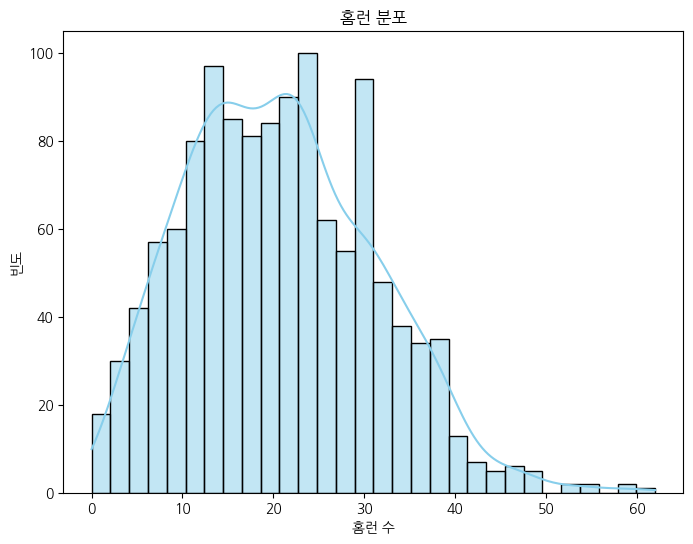

In [58]:
plt.figure(figsize=(8,6))
sns.histplot(df['home_run'], bins=30, kde=True, color='skyblue')
plt.title("홈런 분포")
plt.xlabel("홈런 수")
plt.ylabel("빈도")
plt.show()

타구 스피드와 홈런의 상관계수: 0.54


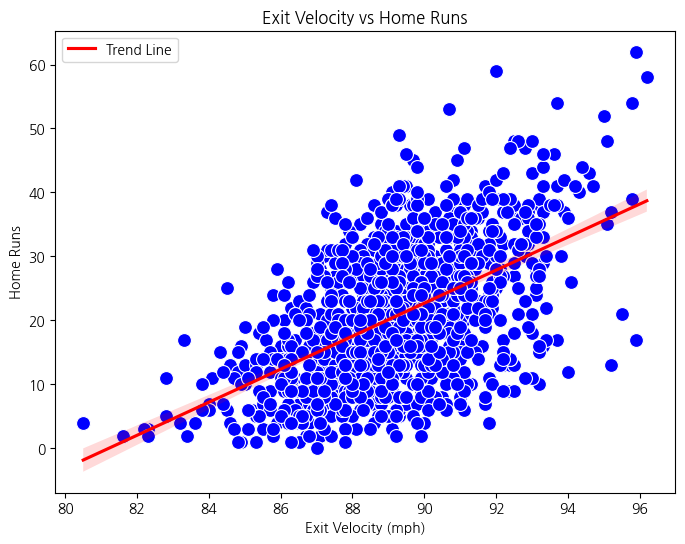

In [60]:
numeric_columns = df.select_dtypes(include=[float, int])
correlation = numeric_columns[["exit_velocity_avg", "home_run"]].corr().iloc[0, 1]
print(f"타구 스피드와 홈런의 상관계수: {correlation:.2f}")

# 시각화: 타구 스피드 vs 홈런
plt.figure(figsize=(8, 6))
sns.scatterplot(x="exit_velocity_avg", y="home_run", data=df, color="blue", s=100)
sns.regplot(x="exit_velocity_avg", y="home_run", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Exit Velocity vs Home Runs")
plt.xlabel("Exit Velocity (mph)")
plt.ylabel("Home Runs")
plt.legend()
plt.show()

발사각과 홈런의 상관계수: 0.40
배럴 타구율과 홈런의 상관계수: 0.69


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


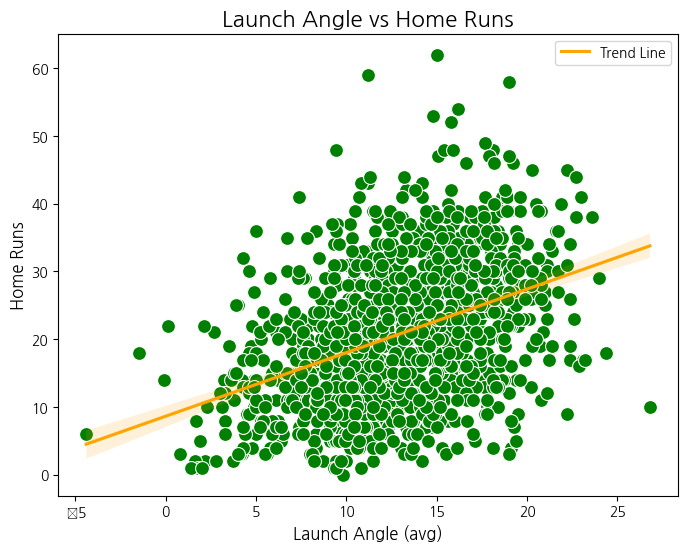

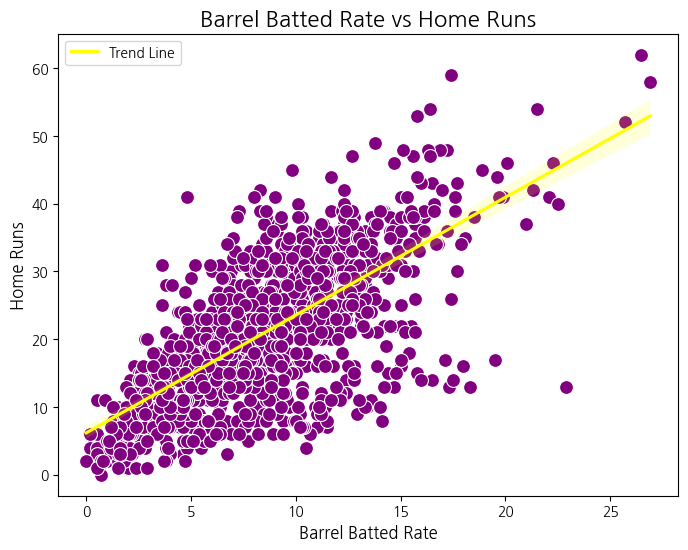

In [98]:

#발사각, 배럴 타구율과 홈런의 상관계수 계산
correlation_launch_angle = numeric_columns[["launch_angle_avg", "home_run"]].corr().iloc[0, 1]
correlation_barrel_rate = numeric_columns[["barrel_batted_rate", "home_run"]].corr().iloc[0, 1]

print(f"발사각과 홈런의 상관계수: {correlation_launch_angle:.2f}")
print(f"배럴 타구율과 홈런의 상관계수: {correlation_barrel_rate:.2f}")

# 시각화: 발사각 vs 홈런
plt.figure(figsize=(8, 6))
sns.scatterplot(x="launch_angle_avg", y="home_run", data=df, color="green", s=100)
sns.regplot(x="launch_angle_avg", y="home_run", data=df, scatter=False, color="orange", label="Trend Line")
plt.title("Launch Angle vs Home Runs", fontsize=16)
plt.xlabel("Launch Angle (avg)", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()

# 시각화: 배럴 타구율 vs 홈런
plt.figure(figsize=(8, 6))
sns.scatterplot(x="barrel_batted_rate", y="home_run", data=df, color="purple", s=100)
sns.regplot(x="barrel_batted_rate", y="home_run", data=df, scatter=False, color="yellow", label="Trend Line")
plt.title("Barrel Batted Rate vs Home Runs", fontsize=16)
plt.xlabel("Barrel Batted Rate", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()


스윗 스팟 비율과 홈런의 상관계수: 0.19
강한 타구 비율과 홈런의 상관계수: 0.53


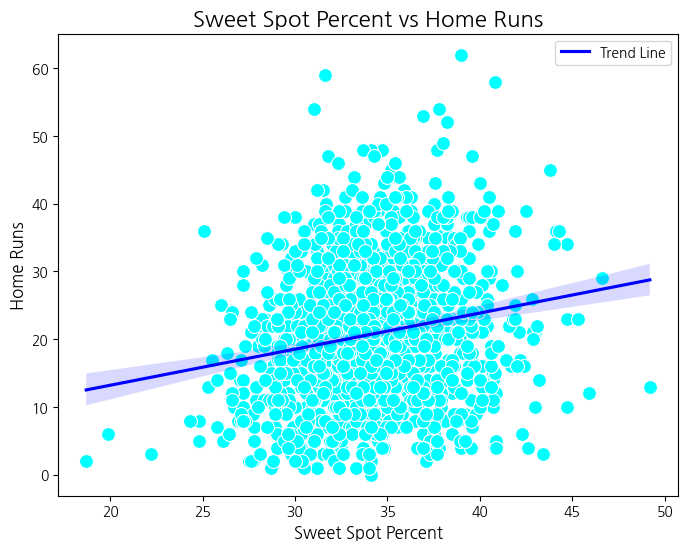

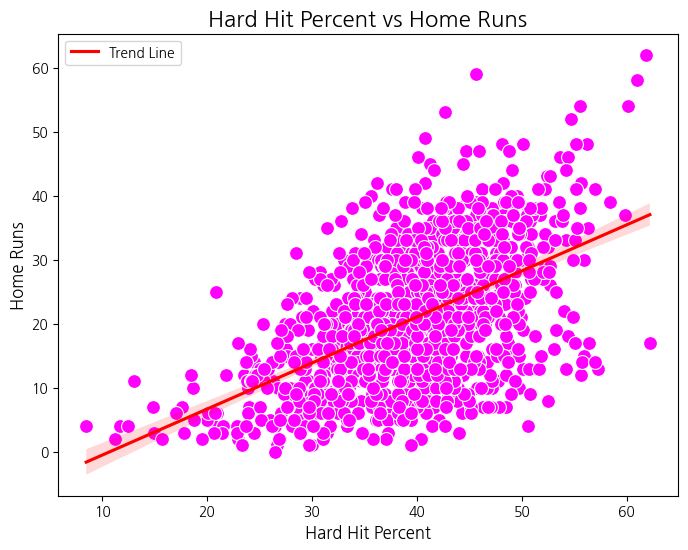

In [74]:
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib import
import seaborn as sns  # seaborn import

# 문자열 컬럼 제외 후 숫자형 컬럼만 선택
numeric_columns = df.select_dtypes(include=[float, int])

# 스윗 스팟 비율, 강한 타구 비율과 홈런의 상관계수 계산
correlation_sweet_spot = numeric_columns[["sweet_spot_percent", "home_run"]].corr().iloc[0, 1]
correlation_hard_hit = numeric_columns[["hard_hit_percent", "home_run"]].corr().iloc[0, 1]

print(f"스윗 스팟 비율과 홈런의 상관계수: {correlation_sweet_spot:.2f}")
print(f"강한 타구 비율과 홈런의 상관계수: {correlation_hard_hit:.2f}")

# 시각화: 스윗 스팟 비율 vs 홈런
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sweet_spot_percent", y="home_run", data=df, color="cyan", s=100)
sns.regplot(x="sweet_spot_percent", y="home_run", data=df, scatter=False, color="blue", label="Trend Line")
plt.title("Sweet Spot Percent vs Home Runs", fontsize=16)
plt.xlabel("Sweet Spot Percent", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()

# 시각화: 강한 타구 비율 vs 홈런
plt.figure(figsize=(8, 6))
sns.scatterplot(x="hard_hit_percent", y="home_run", data=df, color="magenta", s=100)
sns.regplot(x="hard_hit_percent", y="home_run", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Hard Hit Percent vs Home Runs", fontsize=16)
plt.xlabel("Hard Hit Percent", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()


                    correlation   p_value
xiso                   0.893851  0.000000
slg_percent            0.865484  0.000000
b_rbi                  0.853914  0.000000
barrel_batted_rate     0.850726  0.000000
xslg                   0.823559  0.000000
on_base_plus_slg       0.793642  0.000000
woba                   0.761774  0.000000
xwoba                  0.735100  0.000000
hard_hit_percent       0.719337  0.000000
avg_hyper_speed        0.715049  0.000000
exit_velocity_avg      0.701840  0.000000
avg_best_speed         0.698874  0.000000
blasts_contact         0.665001  0.000000
avg_swing_speed        0.628379  0.000000
fast_swing_rate        0.623394  0.000000
blasts_swing           0.611927  0.000000
r_run                  0.597717  0.000000
walk                   0.565986  0.000000
on_base_percent        0.493695  0.000000
b_swinging_strike      0.492416  0.000000
xobp                   0.470505  0.000000
pa                     0.470357  0.000000
bb_percent             0.458657  0

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


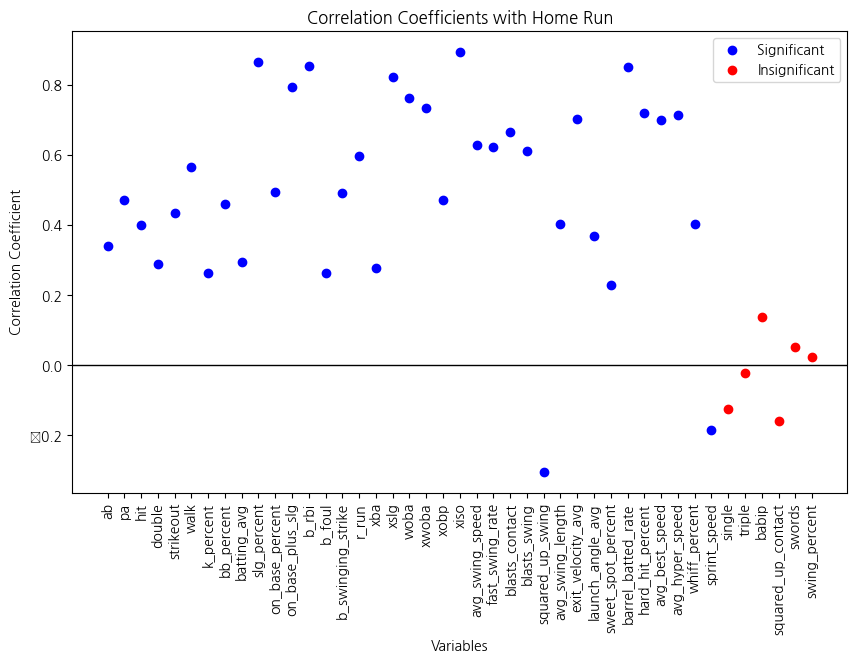

In [126]:
correlations = []
p_values = []

# 상관계수와 p-value 계산
for col in numeric_df.columns:
    if col != 'home_run':  # home_run 제외
        corr, p_value = pearsonr(numeric_df['home_run'], numeric_df[col])
        correlations.append(corr)
        p_values.append(p_value)

correlation_df = pd.DataFrame(correlations, columns=['correlation'], index=numeric_df.columns.drop('home_run'))
p_value_df = pd.DataFrame(p_values, columns=['p_value'], index=numeric_df.columns.drop('home_run'))

# p-value 소수점 형태로 변환
p_value_df['p_value'] = p_value_df['p_value'].apply(lambda x: f'{x:.6f}')

# 상관계수와 p-value 결합
result_df = pd.concat([correlation_df, p_value_df], axis=1)

# correlation 기준으로 내림차순 정렬
result_df_sorted = result_df.sort_values(by='correlation', ascending=False)

print(result_df_sorted)

# p-value 기준으로 유의미한 변수 구분
significant = p_value_df['p_value'].astype(float) < 0.05
insignificant = p_value_df['p_value'].astype(float) >= 0.05

# 시각화
plt.figure(figsize=(10, 6))

# 유의미한 상관관계가 있는 변수
plt.scatter(correlation_df.loc[significant].index, correlation_df.loc[significant]['correlation'], color='blue', label='Significant')

# 유의미하지 않은 상관관계가 있는 변수
plt.scatter(correlation_df.loc[insignificant].index, correlation_df.loc[insignificant]['correlation'], color='red', label='Insignificant')

plt.axhline(0, color='black', linewidth=1)  # y=0 기준선
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.title('Correlation Coefficients with Home Run')
plt.legend()
plt.show()